# PROJECT DATA SCIENCE

## ATTANABIL RABBANI 50421230
________________________________________________

DATA BIKE SHARING
DATASET LINK : https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset
- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor

### Load Datasets
Cell below for kaggle

In [2]:
# FOR KAGGLE
df = pd.read_csv("/kaggle/input/bike-sharing/day.csv")

cell below for non-kaggle, make sure to fit the right directory to the read_csv function

In [3]:
# FOR NON KAGGLE
#df = pd.read_csv("day.csv")

### Show Dataset

In [4]:
df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


### Check The Shape of the Dataset

In [5]:
print("Jumlah Baris: ", df.shape[0])
print("Jumlah Kolom: ", df.shape[1])

Jumlah Baris:  731
Jumlah Kolom:  16


### Check For Missing Values and Datatypes

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [9]:
df['dteday'] = pd.to_datetime(df['dteday'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

### Check For Outliers: Box Plot

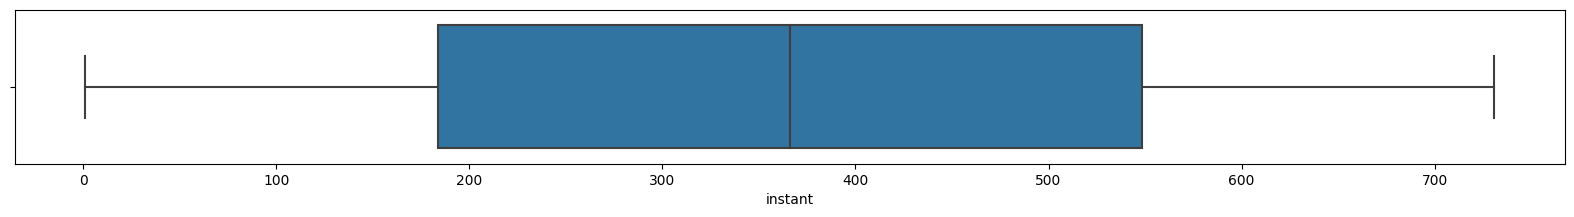

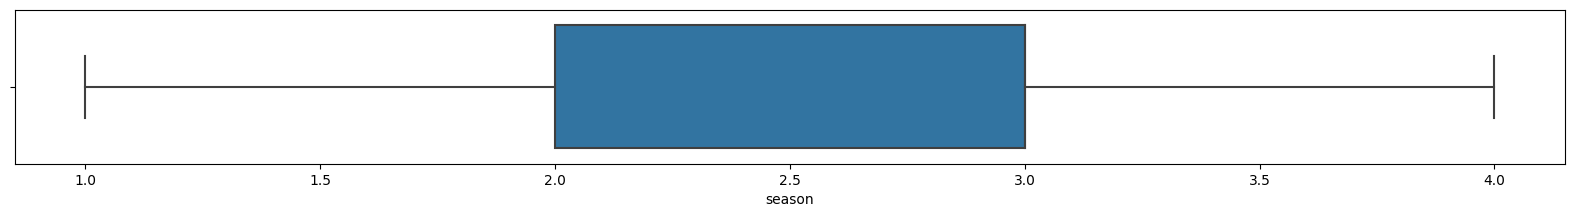

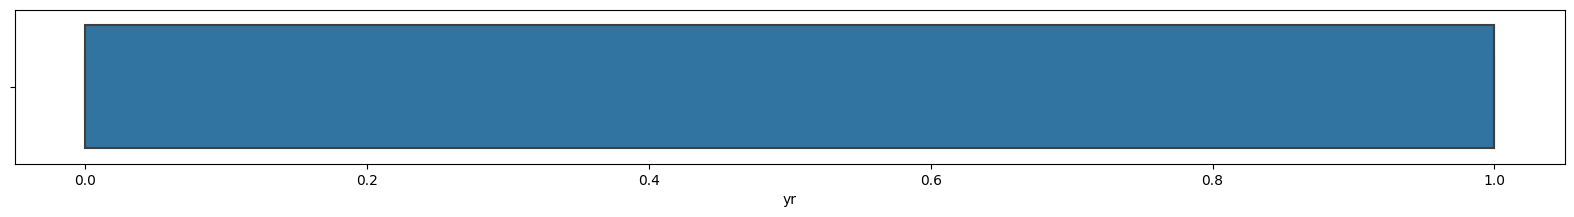

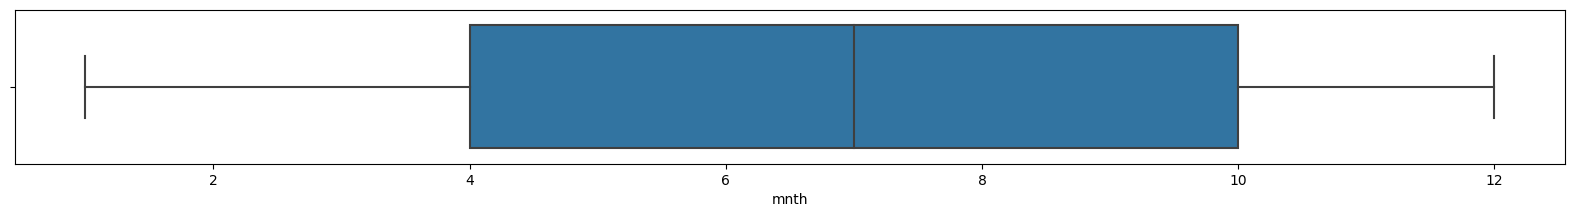

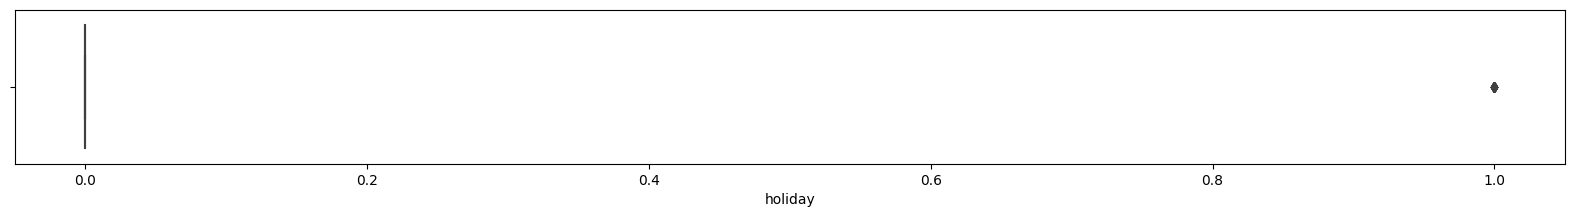

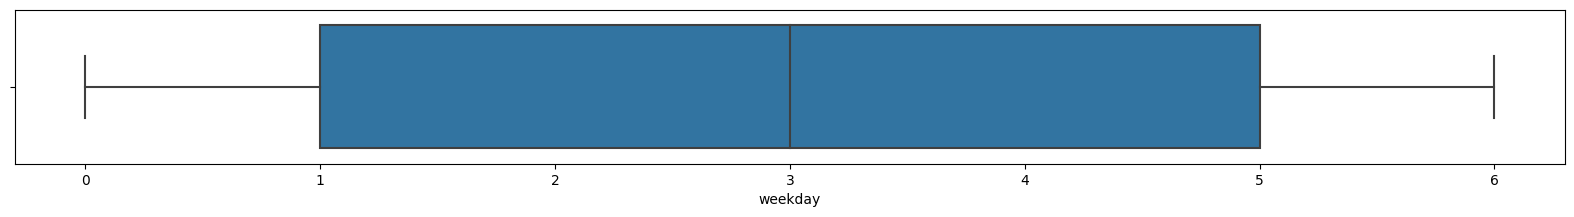

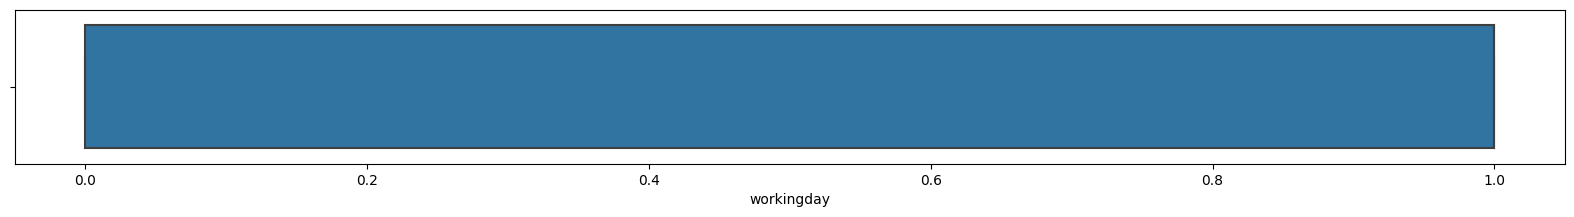

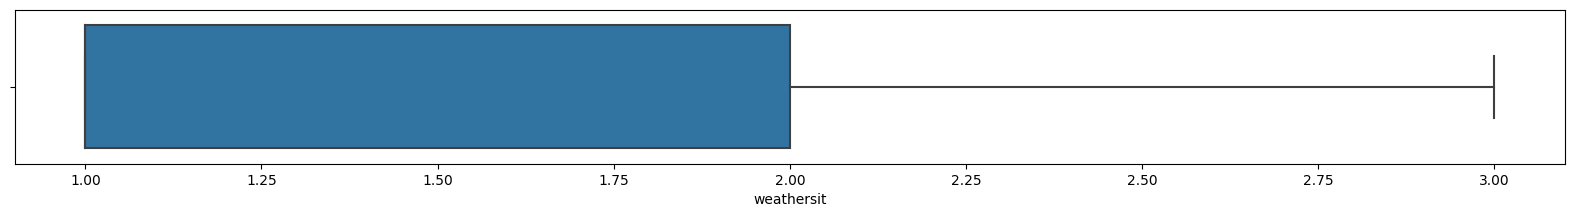

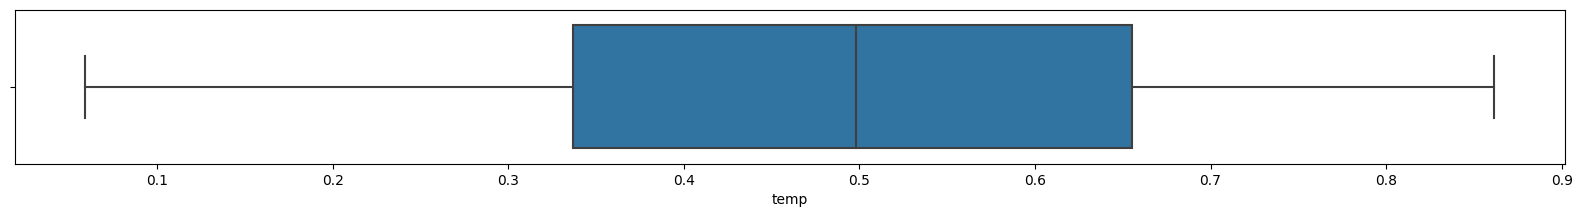

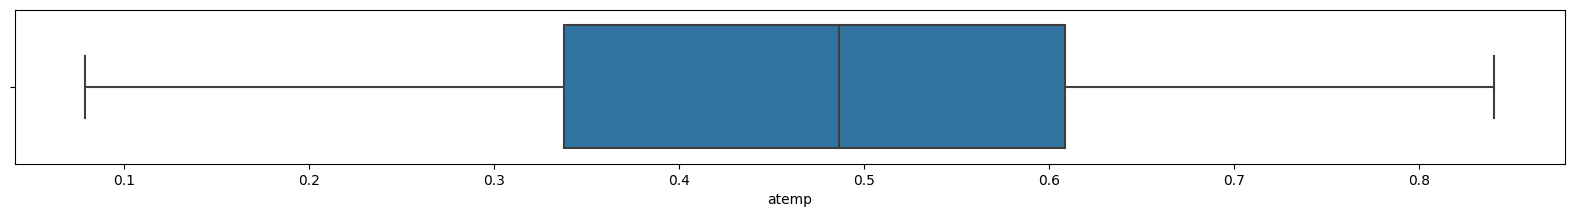

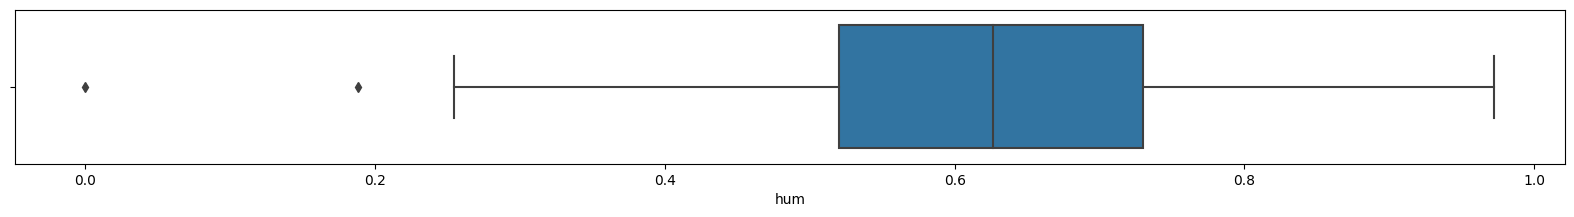

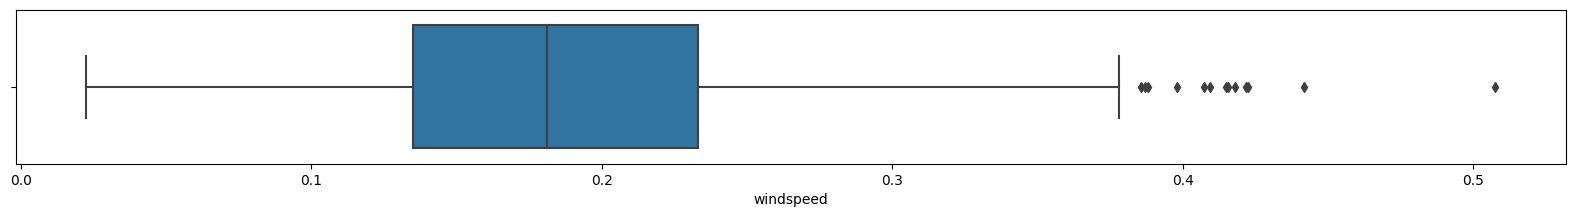

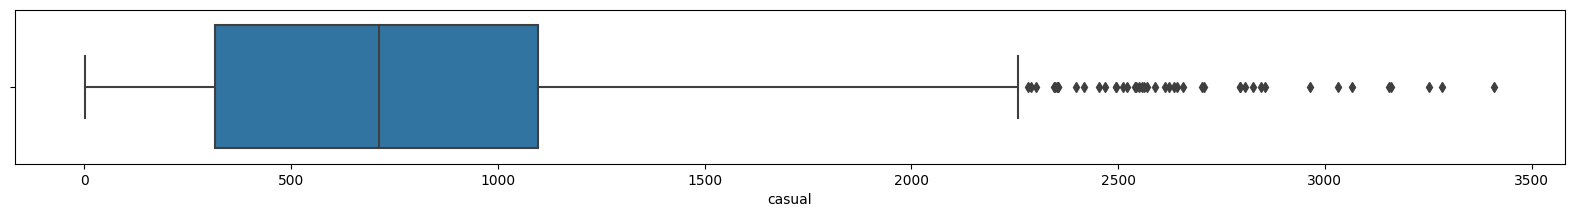

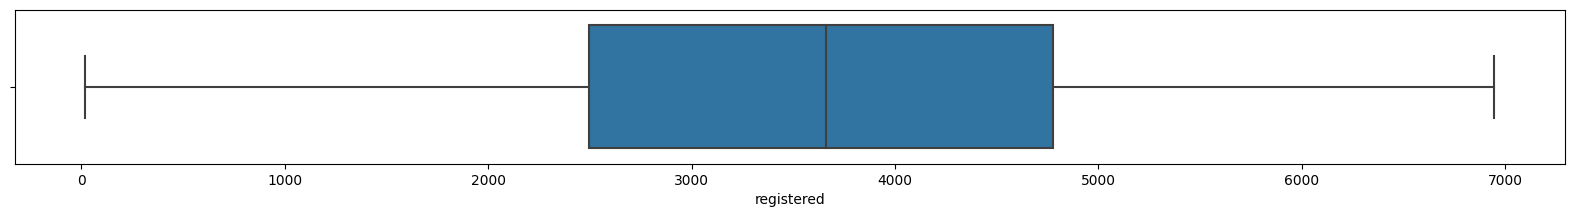

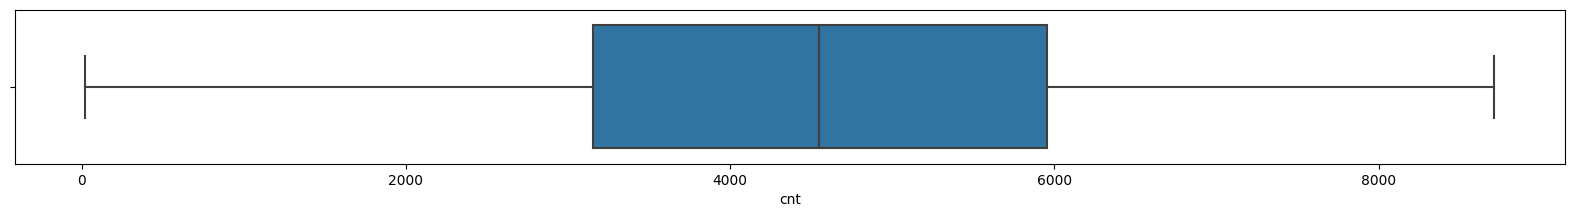

In [10]:
df_outlier = df.select_dtypes(exclude=['object', 'datetime64'])
for column in df_outlier:
        plt.figure(figsize=(20,2))
        sns.boxplot(data=df_outlier, x=column)

### Tukey's Fences Function

In [11]:
# find outliers with tukey's fences
def find_outliers(column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    
    batas_bawah = q1 - 1.5*iqr
    batas_atas = q3 + 1.5*iqr
    
    outlier = df[(df[column] < batas_bawah) | (df[column] > batas_atas)]
    total = df[column].shape[0]
    percent = (outlier.shape[0]/total)*100
    
    return outlier, percent

### Find Outliers in hum (humidity) Column

In [12]:
#mencari outliers hum
hum_outlier, hum_percent = find_outliers("hum")
hum_outlier.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
49,50,2011-02-19,1,0,2,0,6,0,1,0.399167,0.391404,0.187917,0.507463,532,1103,1635
68,69,2011-03-10,1,0,3,0,4,1,3,0.389091,0.385668,0.000000,0.261877,46,577,623


show sum and percentage of outliers

In [13]:
print(f"Jumlah outliers pada kolom hum: {hum_outlier.shape[0]} ({hum_percent:.2f}%)")

Jumlah outliers pada kolom hum: 2 (0.27%)


Drop outliers as there is only 2 outliers, represents 0.27% of overall humidity data.

In [14]:
#dropping outliers
q1 = df["hum"].quantile(0.25)
q3 = df["hum"].quantile(0.75)
iqr = q3 - q1
    
batas_bawah = q1 - 1.5*iqr
batas_atas = q3 + 1.5*iqr

df_cleaned = df[(df['hum'] >= batas_bawah) & (df['hum'] <= batas_atas)]
df_cleaned.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


check shape after cleaned

In [15]:
#2 data deleted
df_cleaned.shape

(729, 16)

<Axes: xlabel='hum'>

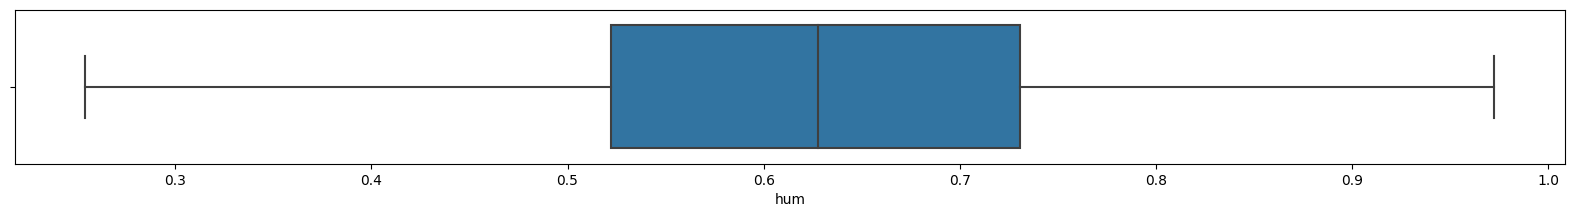

In [49]:
plt.figure(figsize=(20,2))
sns.boxplot(data=df_cleaned, x=df_cleaned['hum'])

### Find Outliers in Windspeed Column

In [16]:
#outliers in windspeed
windspeed_outlier, windspeed_percent = find_outliers("windspeed")
windspeed_outlier.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
44,45,2011-02-14,1,0,2,0,1,1,1,0.415000,0.398350,0.375833,0.417908,208,1705,1913
49,50,2011-02-19,1,0,2,0,6,0,1,0.399167,0.391404,0.187917,0.507463,532,1103,1635
93,94,2011-04-04,2,0,4,0,1,1,1,0.573333,0.542929,0.426250,0.385571,734,2381,3115
94,95,2011-04-05,2,0,4,0,2,1,2,0.414167,0.398350,0.642083,0.388067,167,1628,1795
292,293,2011-10-20,4,0,10,0,4,1,1,0.475833,0.466525,0.636250,0.422275,471,3724,4195


show sum and percentage of outliers

In [17]:
print(f"Jumlah outliers pada kolom windspeed: {windspeed_outlier.shape[0]} ({windspeed_percent:.2f}%)")

Jumlah outliers pada kolom windspeed: 13 (1.78%)


Winsorize by imputing outliers

In [18]:
#winsorizing

df_cleaned["windspeed"] = winsorize(df_cleaned["windspeed"], limits=[0, 0.05])

/tmp/ipykernel_30/9220264.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["windspeed"] = winsorize(df_cleaned["windspeed"], limits=[0, 0.05])


<Axes: xlabel='windspeed'>

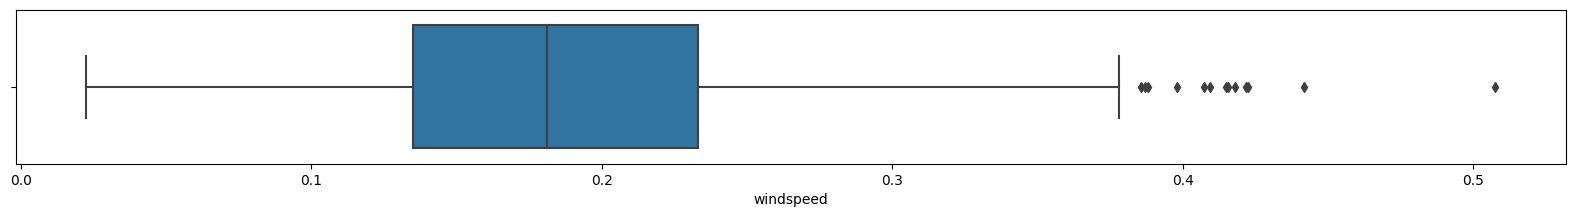

In [19]:
plt.figure(figsize=(20,2))
sns.boxplot(data=df_cleaned, x=df_cleaned['windspeed'])

### Find Outliers in Casual Column

In [20]:
#outliers pada kolom casual
casual_outliers, casual_percent = find_outliers("casual")
casual_outliers.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
148,149,2011-05-29,2,0,5,0,0,0,1,0.667500,0.615550,0.818750,0.213938,2355,2433,4788
183,184,2011-07-03,3,0,7,0,0,0,2,0.716667,0.668575,0.682500,0.228858,2282,2367,4649
184,185,2011-07-04,3,0,7,1,1,0,2,0.726667,0.665417,0.637917,0.081479,3065,2978,6043
196,197,2011-07-16,3,0,7,0,6,0,1,0.686667,0.638263,0.585000,0.208342,2418,3505,5923
246,247,2011-09-04,3,0,9,0,0,0,1,0.709167,0.665429,0.742083,0.206467,2521,2419,4940


In [21]:
print(f"Jumlah outliers pada kolom casual: {casual_outliers.shape[0]} ({casual_percent:.2f}%)")

Jumlah outliers pada kolom casual: 44 (6.02%)


In [22]:
#winsorizing
df_cleaned["casual"] = winsorize(df_cleaned["casual"], limits=[0, 0.05])

/tmp/ipykernel_30/3407807053.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["casual"] = winsorize(df_cleaned["casual"], limits=[0, 0.05])


<Axes: xlabel='casual'>

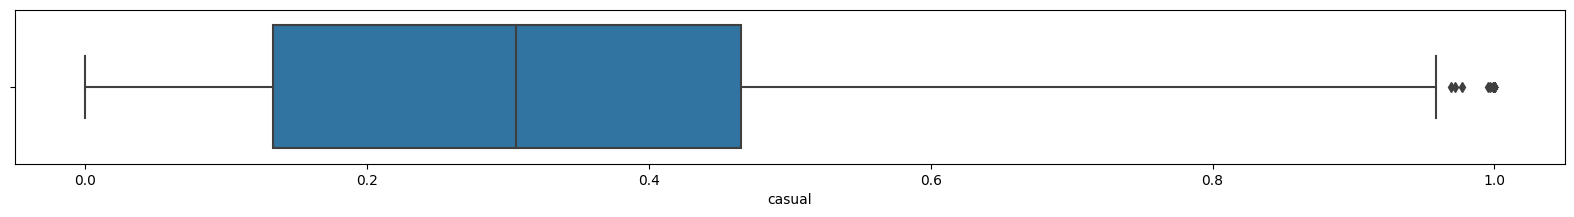

In [48]:
plt.figure(figsize=(20,2))
sns.boxplot(data=df_cleaned, x=df_cleaned['casual'])

### DATA VISUALIZATION

1. Seasonal Rent

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


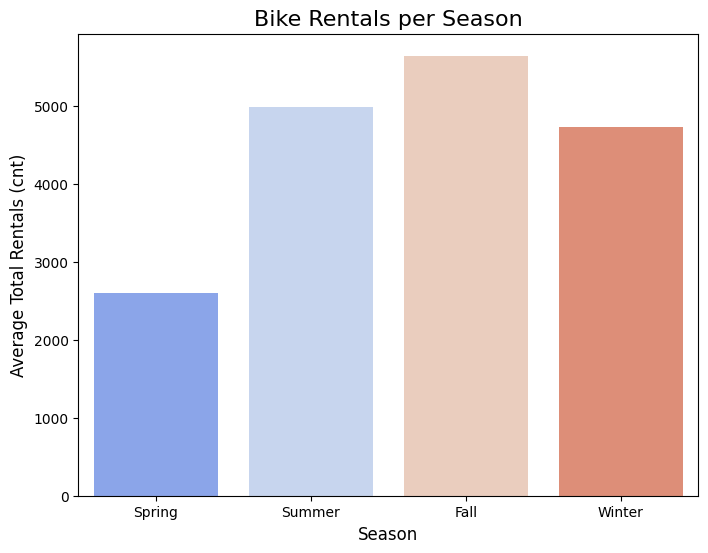

In [24]:
plt.figure(figsize=(8, 6))
sns.barplot(x=['Spring', 'Summer', 'Fall', 'Winter'], y=df_cleaned.groupby('season')['cnt'].mean().values, data=df_cleaned, errorbar=None, palette='coolwarm')

plt.title('Bike Rentals per Season', fontsize=16)
plt.xlabel("Season", fontsize=12)
plt.ylabel('Average Total Rentals (cnt)', fontsize=12)

plt.show()

2. Bike Rental Holiday vs Non-Holiday

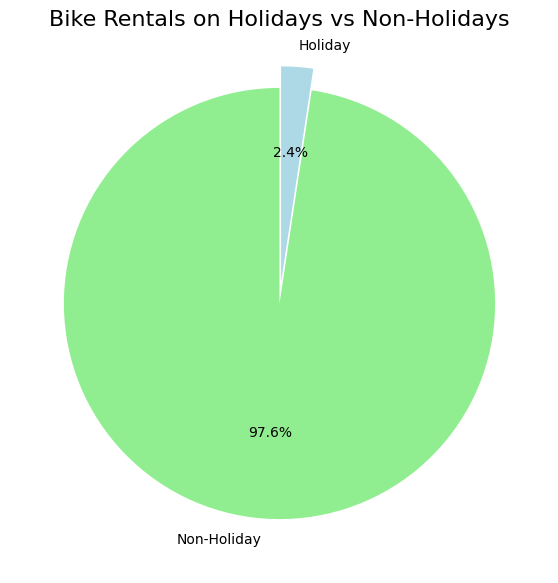

In [25]:
holiday_data = df_cleaned.groupby('holiday')['cnt'].sum()
labels = ['Non-Holiday', 'Holiday']
colors = ['lightgreen', 'lightblue']

plt.figure(figsize=(7, 7))
plt.pie(holiday_data, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=[0, 0.1])

plt.title('Bike Rentals on Holidays vs Non-Holidays', fontsize=16)

plt.show()

3. Yearly comparison

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


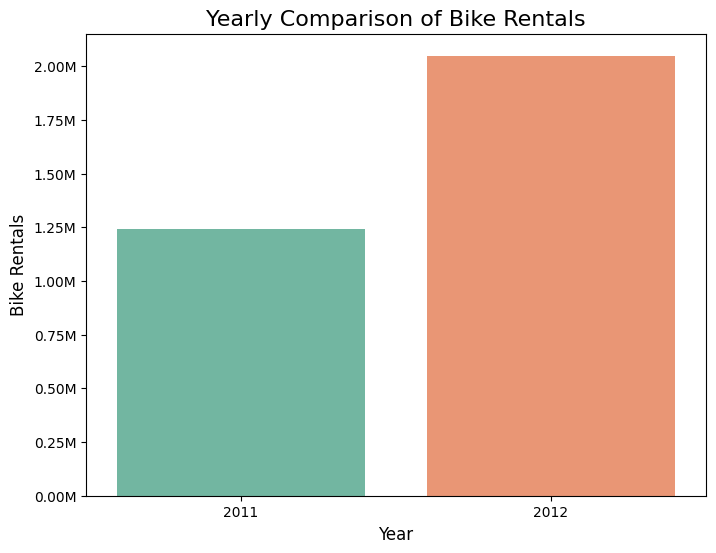

In [26]:
plt.figure(figsize=(8, 6))
sns.barplot(x=["2011", "2012"] , y=df_cleaned.groupby('yr')['cnt'].sum(), data=df_cleaned, palette='Set2')

plt.title('Yearly Comparison of Bike Rentals', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Bike Rentals', fontsize=12)

plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.2f}M".format(x / 1e6)))
plt.show()

4. Average Daily Rent

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


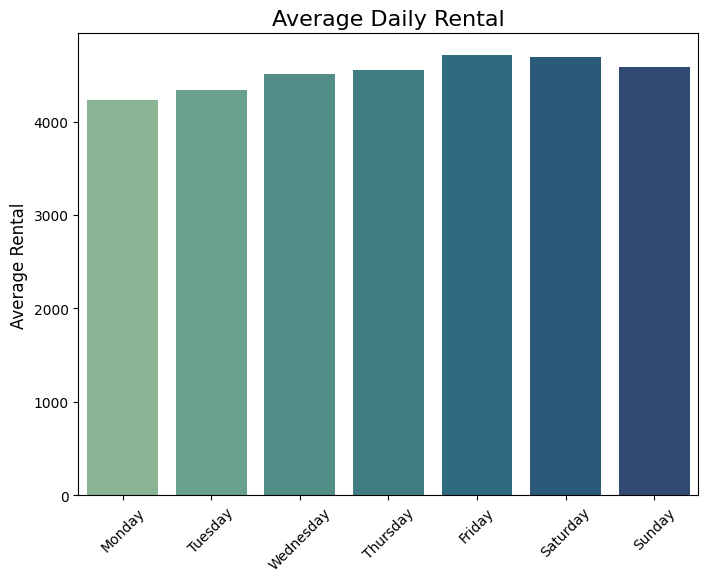

In [27]:
plt.figure(figsize=(8, 6))
sns.barplot(x=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], y=df_cleaned.groupby('weekday')['cnt'].mean().sort_index(), data=df_cleaned, errorbar=None, palette='crest')

plt.title('Average Daily Rental', fontsize=16)
plt.ylabel('Average Rental', fontsize=12)
plt.xticks(rotation=45)

plt.show()

### Scaling

In [28]:
#SCALING
scaler = MinMaxScaler()
df_cleaned[['casual', 'registered']] = scaler.fit_transform(df_cleaned[['casual', 'registered']])

/tmp/ipykernel_30/910900389.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[['casual', 'registered']] = scaler.fit_transform(df_cleaned[['casual', 'registered']])


In [29]:
df_cleaned.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,0.139822,0.091539,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,0.054824,0.093849,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,0.050149,0.174560,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,0.045049,0.207046,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,0.033999,0.216286,1600


In [30]:
X = df_cleaned[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']]
y = df_cleaned['cnt']

### Splitting Data Set

In [31]:
#splitting
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### Modeling : Linear Regression

In [32]:
linear_regression = LinearRegression()

linear_regression.fit(X_train, y_train)

LinearRegression()

In [33]:
lr_predict = linear_regression.predict(X_test)

lr_predict_df = pd.DataFrame({"Actual Value":y_test, "Predicted Value":lr_predict})
lr_predict_df.head(15)

,Actual Value,Predicted Value
470,7132,5899.917031
150,3982,5229.948118
304,4068,3874.292111
357,1011,2095.171956
517,4127,5773.539586
268,4630,4374.428663
74,2192,1783.668658
83,2210,2634.792718
135,3958,3889.219421
344,2743,2983.516476


In [34]:
mae_lr = mean_absolute_error(y_test, lr_predict)
mse_lr = mean_squared_error(y_test, lr_predict)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, lr_predict)

print(f"Mean Absolute Error (MAE): {mae_lr:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lr:.2f}")
print(f"R-squared (R²): {r2_lr:.2f}")

Mean Absolute Error (MAE): 605.27
Root Mean Squared Error (RMSE): 774.06
R-squared (R²): 0.83


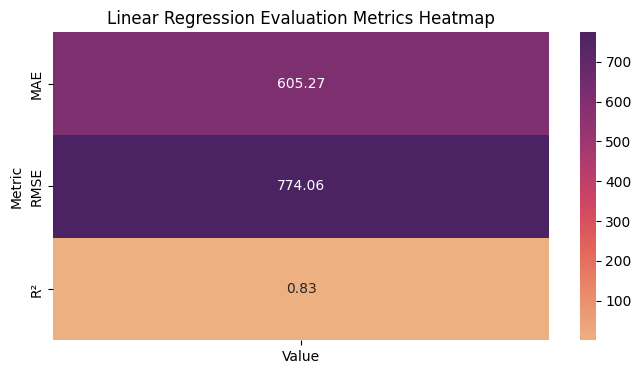

In [35]:
metrics_heatmap = pd.DataFrame({
    'Metric': ['MAE', 'RMSE', 'R²'],
    'Value': [mae_lr, rmse_lr, r2_lr]
}).set_index('Metric')

plt.figure(figsize=(8, 4))
sns.heatmap(metrics_heatmap, annot=True, cmap='flare', cbar=True, fmt=".2f")
plt.title('Linear Regression Evaluation Metrics Heatmap')
plt.show()

### Modeling: KNN

In [36]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

KNeighborsClassifier()

In [37]:
knn_pred = knn.predict(X_test)

knn_predict_df = pd.DataFrame({"Actual Value":y_test, "Predicted Value":knn_pred})
knn_predict_df.head(15)

,Actual Value,Predicted Value
470,7132,3744
150,3982,4400
304,4068,4035
357,1011,1341
517,4127,5870
268,4630,3570
74,2192,1526
83,2210,1746
135,3958,4073
344,2743,2424


In [38]:
mae_knn = mean_absolute_error(y_test, knn_pred)
mse_knn = mean_squared_error(y_test, knn_pred)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, knn_pred)

print(f"Mean Absolute Error (MAE): {mae_knn:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_knn:.2f}")
print(f"R-squared (R²): {r2_knn:.2f}")

Mean Absolute Error (MAE): 1143.10
Root Mean Squared Error (RMSE): 1533.32
R-squared (R²): 0.33


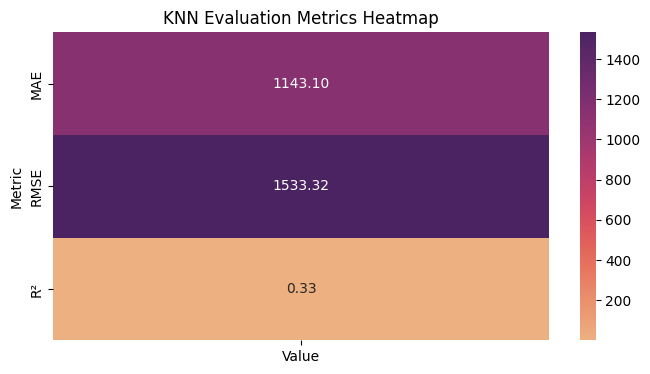

In [39]:
knn_metrics_heatmap = pd.DataFrame({
    'Metric': ['MAE', 'RMSE', 'R²'],
    'Value': [mae_knn, rmse_knn, r2_knn]
}).set_index('Metric')

plt.figure(figsize=(8, 4))
sns.heatmap(knn_metrics_heatmap, annot=True, cmap='flare', cbar=True, fmt=".2f")
plt.title('KNN Evaluation Metrics Heatmap')
plt.show()

### Modeling: Decision Tree

In [40]:
dt = DecisionTreeRegressor(random_state=42)

dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [41]:
dt_pred = dt.predict(X_test)
dt_predict_df = pd.DataFrame({"Actual Value":y_test, "Predicted Value":dt_pred})
dt_predict_df.head(15)

,Actual Value,Predicted Value
470,7132,6118.0
150,3982,4541.0
304,4068,4035.0
357,1011,2302.0
517,4127,5099.0
268,4630,3907.0
74,2192,2455.0
83,2210,1944.0
135,3958,4553.0
344,2743,3322.0


In [42]:
mae_dt = mean_absolute_error(y_test, dt_pred)
mse_dt = mean_squared_error(y_test, dt_pred)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, dt_pred)

print(f"Mean Absolute Error (MAE): {mae_dt:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_dt:.2f}")
print(f"R-squared (R²): {r2_dt:.2f}")

Mean Absolute Error (MAE): 621.34
Root Mean Squared Error (RMSE): 868.76
R-squared (R²): 0.78


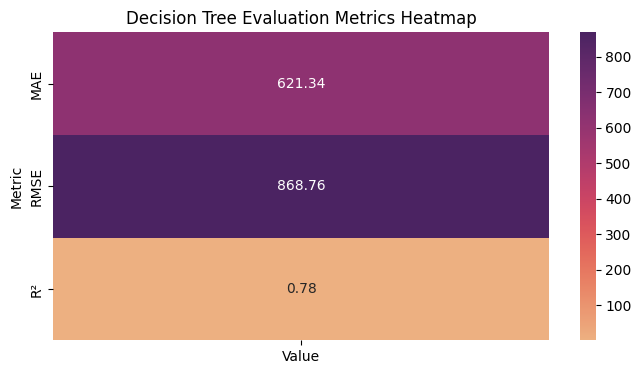

In [43]:
dt_metrics_heatmap = pd.DataFrame({
    'Metric': ['MAE', 'RMSE', 'R²'],
    'Value': [mae_dt, rmse_dt, r2_dt]
}).set_index('Metric')

plt.figure(figsize=(8, 4))
sns.heatmap(dt_metrics_heatmap, annot=True, cmap='flare', cbar=True, fmt=".2f")
plt.title('Decision Tree Evaluation Metrics Heatmap')
plt.show()

### Model Evaluation

In [44]:
MODEL =["Linear Regression", "KNN", "Decision Tree"]
MAE = [mae_lr, mae_knn, mae_dt]
RMSE = [rmse_lr, rmse_knn, rmse_dt]
R2 = [r2_lr, r2_knn, r2_dt]

metrics_combined = pd.DataFrame({"Model":MODEL, "MAE":MAE,"RMSE":RMSE,"R²":R2})
metrics_combined.set_index('Model', inplace=True)
metrics_combined.head()

,MAE,RMSE,R²
Model,,,
Linear Regression,605.269302,774.062309,0.828676
KNN,1143.095890,1533.315385,0.327753
Decision Tree,621.342466,868.761865,0.784192


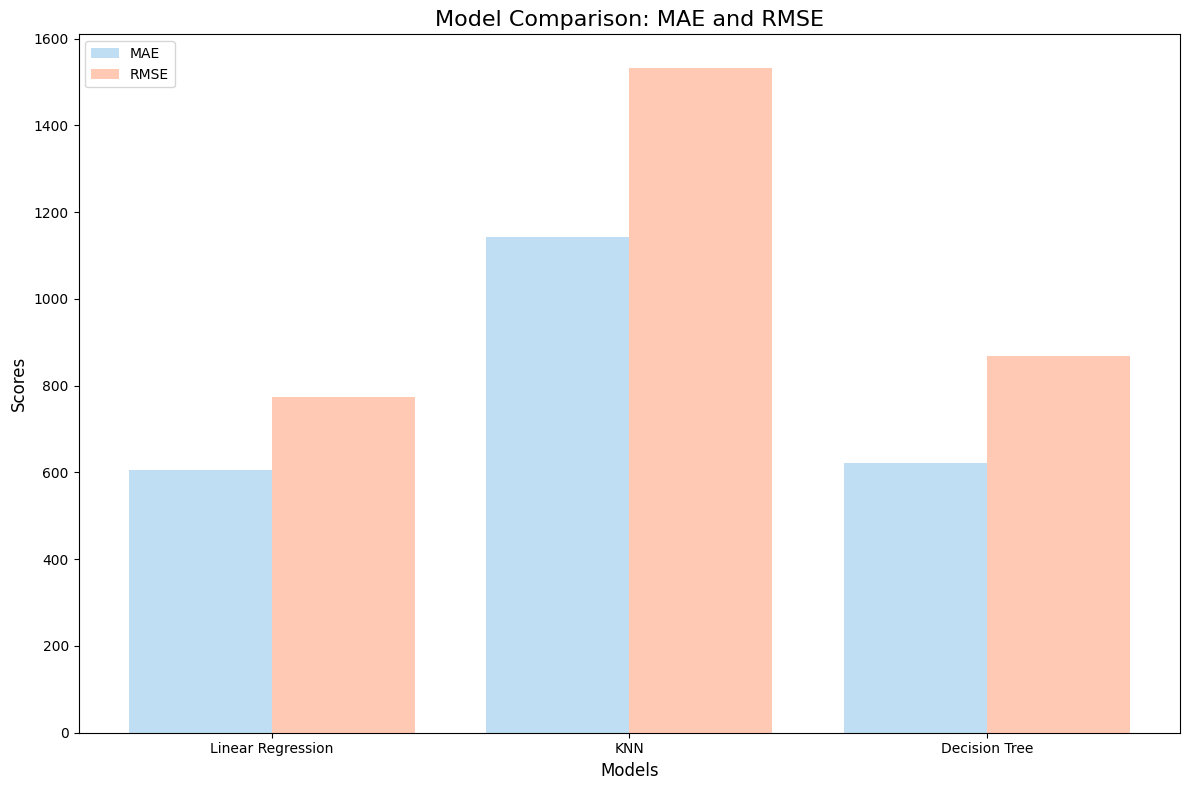

In [45]:
plt.figure(figsize=(12, 8))
bar_width = 0.4
x = np.arange(len(metrics_combined))

plt.bar(x - bar_width/2, metrics_combined['MAE'], width=bar_width, label='MAE', color="#BFDEF3")
plt.bar(x + bar_width/2, metrics_combined['RMSE'], width=bar_width, label='RMSE', color="#FFC9B4")

plt.title('Model Comparison: MAE and RMSE', fontsize=16)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Scores', fontsize=12)
plt.xticks(x, metrics_combined.index)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

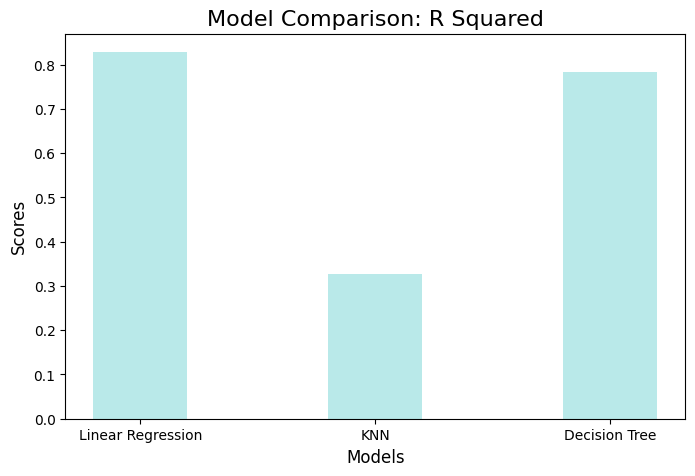

In [46]:
plt.figure(figsize=(8, 5))

plt.bar(["Linear Regression", "KNN", "Decision Tree"], metrics_combined["R²"], width=0.4, color="#B9E9E9")

plt.title('Model Comparison: R Squared', fontsize=16)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Scores', fontsize=12)

plt.show()

### Save Cleaned Data CSV 

In [47]:
df_cleaned.to_csv('day_cleaned.csv', index=False)